# Los Angeles Police Killings

This notebook will explore the Los Angeles Times' database of people killed by local police in Los Angeles County.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Import data

Pull the data from the LA Times Data and Graphics Department's [github repository](https://github.com/datadesk/los-angeles-police-killings-data) containing the [database](https://github.com/datadesk/los-angeles-police-killings-data/blob/master/los-angeles-police-killings.csv).

The data was pulled on June 11, 2020 at 8:30PM.

In [3]:
killings_data = pd.read_csv('https://raw.githubusercontent.com/datadesk/los-angeles-police-killings-data/master/los-angeles-police-killings.csv')

## Explore the database

Looking at the head of the dataset:

In [4]:
killings_data.head()

,slug,death_date,first_name,middle_name,last_name,age,race,gender,cause,address,neighborhood,x,y
0,robert-melton-colvin,2020-05-29,Robert,Melton,Colvin,39,white,male,gunshot,1700 block W. Avenue K,Lancaster,-118.161524,34.674637
1,rommel-firmalino-mendoza,2020-05-27,Rommel,Firmalino,Mendoza,50,latino,male,gunshot,6400 block of Elmer Ave.,North Hollywood,-118.376882,34.186690
2,robert-avitia,2020-05-26,Robert,NaN,Avitia,18,latino,male,gunshot,1100 block of West 109th Place,Westmont,-118.294389,33.936126
3,anthony-ysaac,2020-05-14,Anthony,NaN,Ysaac,26,latino,male,gunshot,733 W. 123rd St.,Harbor Gateway,-118.288177,33.921445
4,lloyd-nelson-jr,2020-05-08,Lloyd,NaN,Nelson,47,other,NaN,NaN,Corson Street and Allen Avenue,Pasadena,-118.113302,34.151841


Info of the variables:

In [5]:
killings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   slug          885 non-null    object 
 1   death_date    885 non-null    object 
 2   first_name    885 non-null    object 
 3   middle_name   534 non-null    object 
 4   last_name     885 non-null    object 
 5   age           885 non-null    int64  
 6   race          882 non-null    object 
 7   gender        884 non-null    object 
 8   cause         884 non-null    object 
 9   address       879 non-null    object 
 10  neighborhood  879 non-null    object 
 11  x             879 non-null    float64
 12  y             879 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 90.0+ KB


Describe the numeric variables:

In [28]:
killings_data.describe()

,age,x,y
count,885.000000,879.000000,879.000000
mean,32.855367,-118.239551,34.032251
std,12.126944,0.156728,0.174744
min,1.000000,-118.704535,33.737677
25%,23.000000,-118.332933,33.923810
50%,30.000000,-118.249004,34.012065
75%,40.000000,-118.160446,34.095034
max,84.000000,-117.728001,34.717889


Convert the `death_date` to datetime:

In [24]:
killings_data['death_date'] = pd.to_datetime(killings_data.death_date)

In [25]:
killings_data.death_date.head()

0   2020-05-29
1   2020-05-27
2   2020-05-26
3   2020-05-14
4   2020-05-08
Name: death_date, dtype: datetime64[ns]

In [29]:
killings_data.describe(include='all')

,slug,death_date,first_name,middle_name,last_name,age,race,gender,cause,address,neighborhood,x,y
count,885,885,885,534,885,885.000000,882,884,884,879,879,879.000000,879.000000
unique,885,822,440,327,625,NaN,5,2,4,865,189,NaN,NaN
top,omar-garcia,2001-02-18 00:00:00,Jose,Lee,Garcia,NaN,latino,male,gunshot,Front of 8328 Gaynor Ave.,Long Beach,NaN,NaN
freq,1,3,26,12,20,NaN,465,851,870,2,60,NaN,NaN
first,NaN,2000-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-05-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,32.855367,NaN,NaN,NaN,NaN,NaN,-118.239551,34.032251
std,NaN,NaN,NaN,NaN,NaN,12.126944,NaN,NaN,NaN,NaN,NaN,0.156728,0.174744
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,-118.704535,33.737677
25%,NaN,NaN,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,-118.332933,33.923810


### Missing data

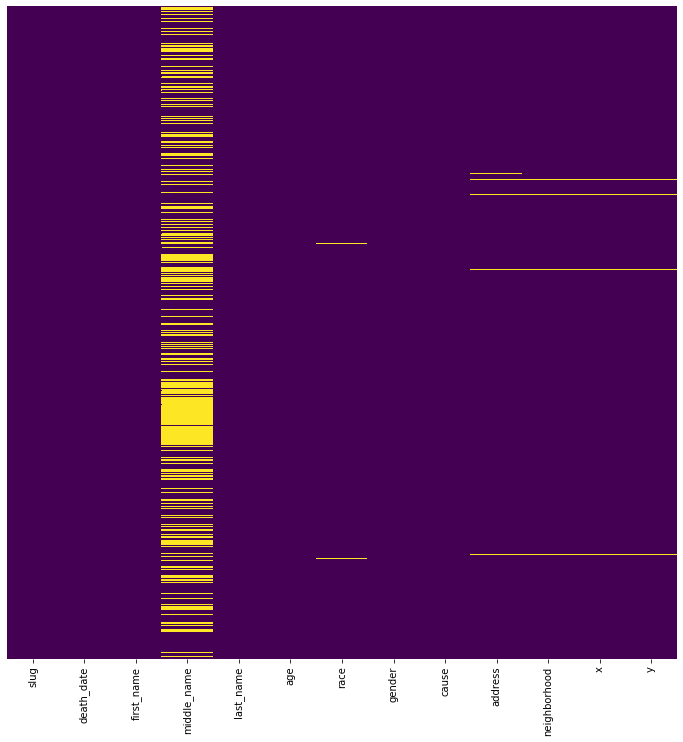

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(killings_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [17]:
killings_data.isnull().sum()

slug              0
death_date        0
first_name        0
middle_name     351
last_name         0
age               0
race              3
gender            1
cause             1
address           6
neighborhood      6
x                 6
y                 6
dtype: int64

In [20]:
killings_data[killings_data.race.isnull()]

,slug,death_date,first_name,middle_name,last_name,age,race,gender,cause,address,neighborhood,x,y
57,robert-george-olivas,2018-10-20,Robert,George,Olivas,33,NaN,male,other,12051 Ventura Place,Studio City,-118.394289,34.144649
322,rigoberto-arceo,2013-05-11,Rigoberto,NaN,Arceo,34,NaN,male,gunshot,4105 Walnut St.,Cudahy,-118.195148,33.970239
749,yousuf-ali-mollah,2003-07-27,Yousuf,Ali,Mollah,32,NaN,male,gunshot,945 N. Serrano Ave.,East Hollywood,-118.306776,34.087587


In [23]:
killings_data[killings_data.address.isnull() | killings_data.neighborhood.isnull()  | killings_data.x.isnull()  | killings_data.y.isnull()]

,slug,death_date,first_name,middle_name,last_name,age,race,gender,cause,address,neighborhood,x,y
16,kerry-michael-bounsom,2020-02-16,Kerry,Michael,Bounsom,33,black,male,gunshot,East Rhea Street & Martin Luther King Jr. Avenue,NaN,NaN,NaN
227,henry-ybarra-acuna,2015-03-18,Henry,Ybarra,Acuna,56,latino,male,gunshot,NaN,Pomona,-117.754929,34.039716
235,michael-frederick-mears,2014-12-26,Michael,Frederick,Mears,39,white,male,other,NaN,NaN,NaN,NaN
256,omar-figueroa-abrego,2014-08-03,Omar,Figueroa,Abrego,37,latino,male,other,NaN,NaN,NaN,NaN
357,vachel-howard-sr,2012-06-04,Vachel,NaN,Howard,56,black,male,other,NaN,NaN,NaN,NaN
744,ronald-eduardo-guzman,2003-08-22,Ronald,Eduardo,Guzman,19,latino,male,gunshot,NaN,NaN,NaN,NaN
792,david-miranda,2002-09-23,David,NaN,Miranda,28,latino,male,gunshot,NaN,NaN,NaN,NaN
